<a href="https://colab.research.google.com/github/RaghulJ06/Deep_Learning/blob/main/ANN_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Artificial Neural Network

- MNIST Dataset

### Step 1: Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Step 2: Load and preprocess the MNIST dataset from mnist.csv

In [ ]:
mnist_df = pd.read_csv('/content/sample_data/mnist_train_small.csv')

In [ ]:
mnist_df.head(2)

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Split the dataset into features (pixels) and labels (target)

features = mnist_df.drop('label', axis=1)
labels = mnist_df['label']

In [ ]:
# Normalize pixel values to be in the range [0, 1]

features = features / 255.0

In [ ]:
# Convert features and labels to NumPy arrays

features = np.array(features)
labels = np.array(labels)

In [ ]:
# Reshape the features to match the expected input shape

features = features.reshape(-1, 28, 28)

In [ ]:
# Reshape the labels to be one-dimensional

labels = labels.reshape(-1)

### Step 3: Build the ANN model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to a 1D array
    keras.layers.Dense(128, activation='relu'),   # Fully connected layer with 128 neurons and ReLU activation
    keras.layers.Dropout(0.2),                   # Dropout layer to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (for 0-9 digits) and softmax activation
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Cross-entropy loss for classification
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Step 4: Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Cross-entropy loss for classification
              metrics=['accuracy'])

### Step 5: Train the model

In [ ]:
model.fit(features, labels, epochs = 5)  # You can adjust the number of epochs

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8488 - loss: 0.5337
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9454 - loss: 0.1768
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9623 - loss: 0.1226
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9699 - loss: 0.0956
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9758 - loss: 0.0773


### Step 6: Make predictions

In [ ]:
predictions = model.predict(features)  # Use the same dataset for predictions (not recommended for real-world use)

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


### Step 7: Visualize the results

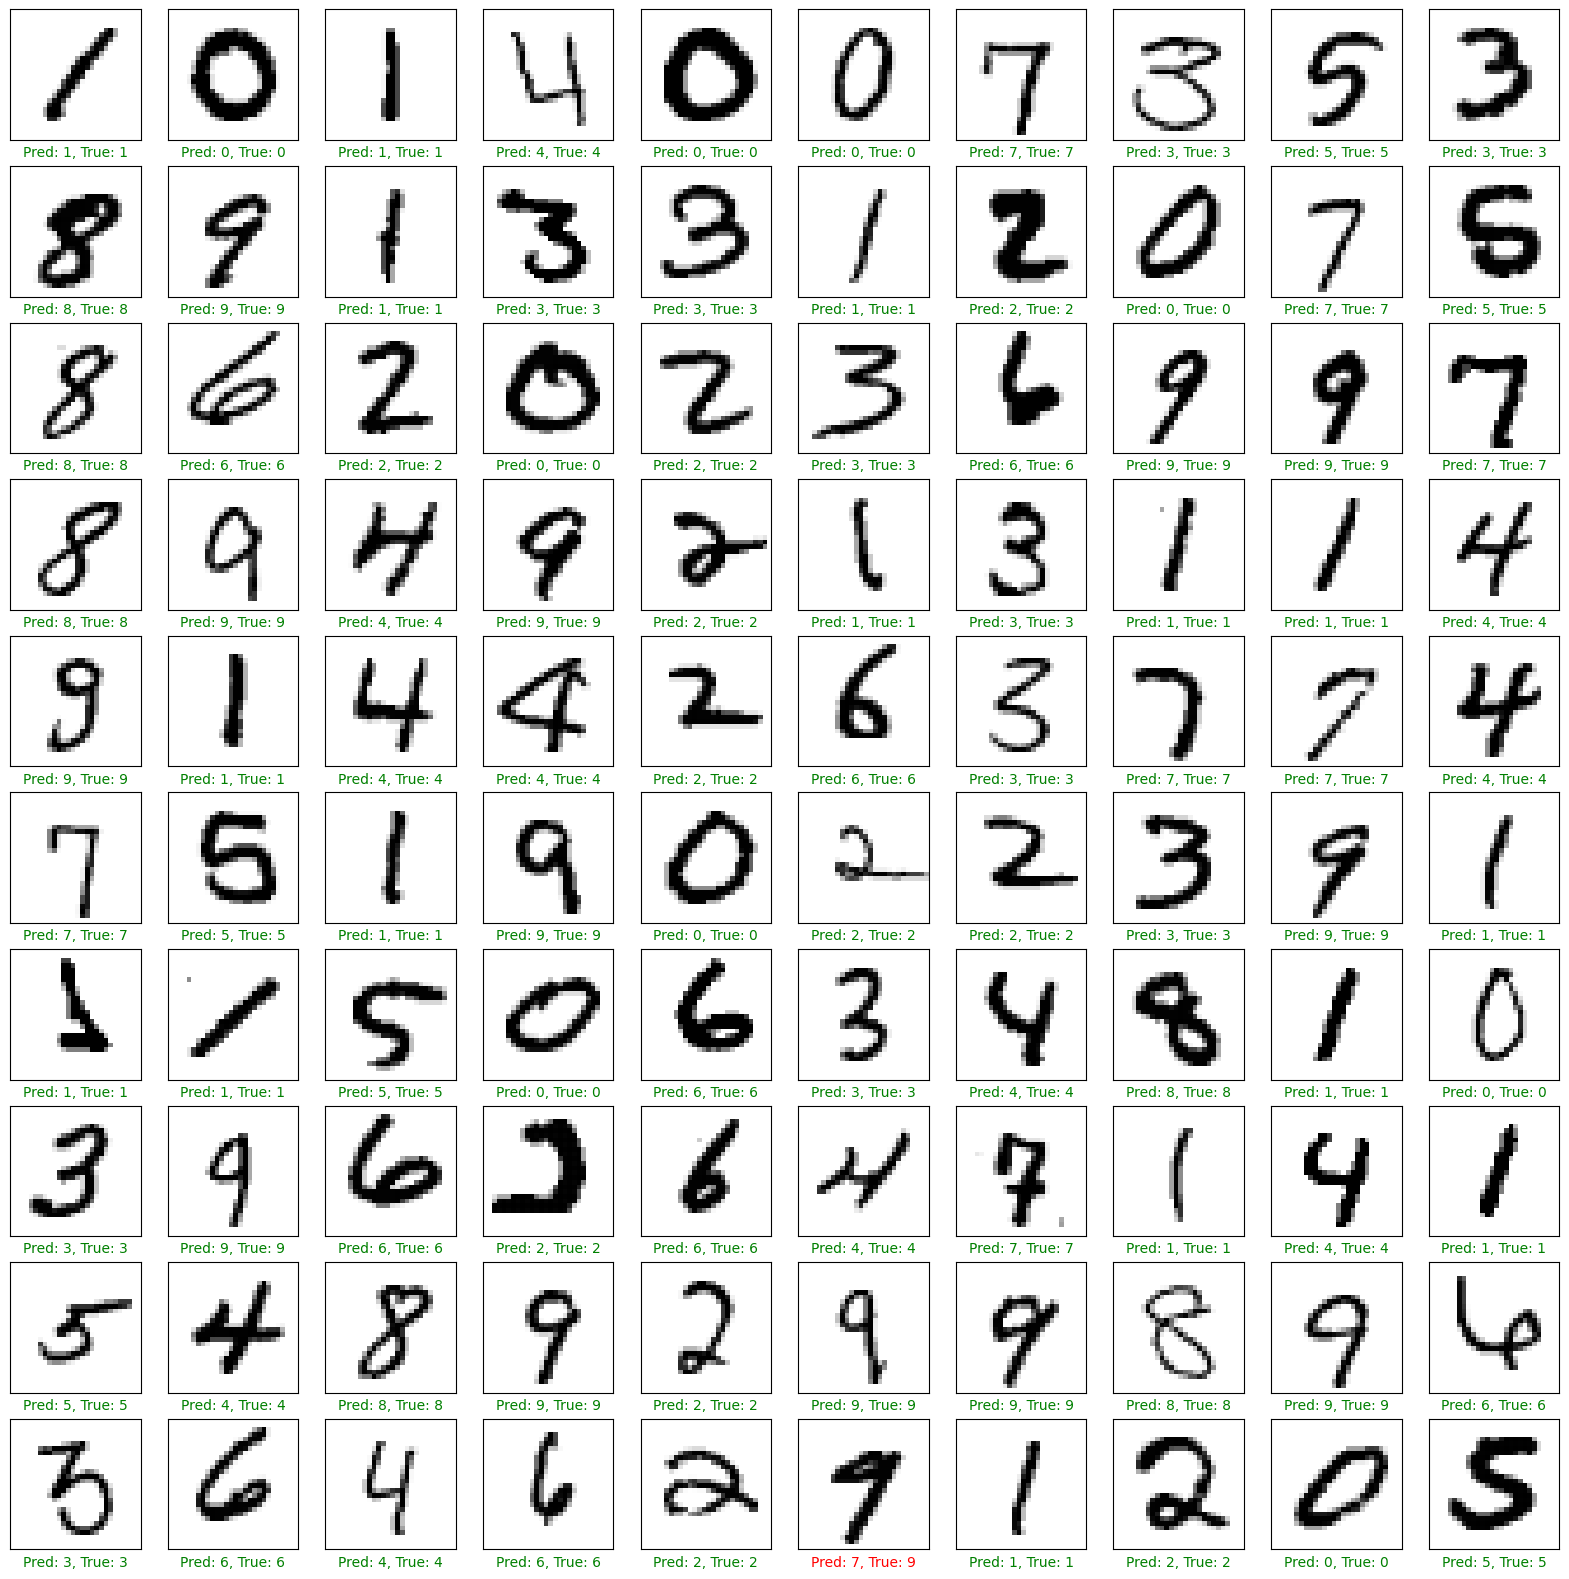

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(features[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"Pred: {predicted_label}, True: {true_label}", color=color)
plt.show()

In [ ]:
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]

In [ ]:
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]

dot_product_1 = first_indexes_mult + second_indexes_mult
print(f"The dot product is: {dot_product_1}")

The dot product is: 2.1672


In [ ]:
import numpy as np

dot_product_1 = np.dot(input_vector, weights_1)

print(f"The dot product is: {dot_product_1}")

The dot product is: 2.1672


In [ ]:
# Wrapping the vectors in NumPy arrays
input_vector = np.array([1.66, 1.56])
weights_1 = np.array([1.45, -0.66])
bias = np.array([0.0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def make_prediction(input_vector, weights, bias):
     layer_1 = np.dot(input_vector, weights) + bias
     layer_2 = sigmoid(layer_1)
     return layer_2

prediction = make_prediction(input_vector, weights_1, bias)

print(f"The prediction result is: {prediction}")

The prediction result is: [0.7985731]
